# Asthma Data
This data began as 5 csv files. Since the set were relatively small they were simply merged in the Mac Numbers program. The data didn't need too much clean up. There were some data type changes, entire column deletions and dataframe shape manipluation. The largest piece of exploration for this set was a visulaiztion of the asthma emergency room visits by county and  year.

In [1]:
# imports
import csv
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
asthma_data = pd.read_csv('county_asthma.csv') #creating pandas dataframe 
asthma_data.drop(['Description','Group'], axis=1, inplace=True) #removing unhelpful columns
asthma_data.info() #looking at the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Asthma measure  48 non-null     object 
 1   CA number       48 non-null     object 
 2   CA rate         48 non-null     float64
 3   County          48 non-null     object 
 4   County number   48 non-null     object 
 5   County rate     48 non-null     float64
 6   Year            48 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


In [3]:
asthma_data.head()

,Asthma measure,CA number,CA rate,County,County number,County rate,Year
0,Asthma ED visits,"191,904",50.4,Orange,"10,275",33.9,2015.0
1,Asthma hospitalizations,"27,262",7.0,Orange,"1,713",5.5,2015.0
2,Asthma ED visits,"174,733",45.8,Orange,"8,878",29.2,2016.0
3,Asthma ED visits,"180,053",46.9,Orange,"9,084",29.7,2017.0
4,Asthma ED visits,"163,807",42.4,Orange,"8,183",26.5,2018.0


In [4]:
asthma_data.columns = [c.replace(' ', '_') for c in asthma_data.columns] #adding underscores to column names
asthma_data= asthma_data.replace(',','', regex=True) #getting rid of commas

In [5]:
is_NaN = asthma_data.isnull() #identifying any full NaN rows
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN =asthma_data[row_has_NaN]
print(rows_with_NaN)

   Asthma_measure CA_number  CA_rate County County_number  County_rate  Year
32            NaN       NaN      NaN    NaN           NaN          NaN   NaN


In [6]:
asthma_data = asthma_data.drop(labels=32, axis=0) #droping full NaN row

In [7]:
asthma_data = asthma_data.astype({"CA_number": int, "Year": int}) #changing columns data type

In [8]:
asthma_data.head()

,Asthma_measure,CA_number,CA_rate,County,County_number,County_rate,Year
0,Asthma ED visits,191904,50.4,Orange,10275,33.9,2015
1,Asthma hospitalizations,27262,7.0,Orange,1713,5.5,2015
2,Asthma ED visits,174733,45.8,Orange,8878,29.2,2016
3,Asthma ED visits,180053,46.9,Orange,9084,29.7,2017
4,Asthma ED visits,163807,42.4,Orange,8183,26.5,2018


In [9]:
adg = asthma_data.groupby(['Asthma_measure','Year'])
adg.first()

CA_number  CA_rate  County County_number  \
Asthma_measure          Year                                             
Asthma ED visits        2015     191904     50.4  Orange         10275   
                        2016     174733     45.8  Orange          8878   
                        2017     180053     46.9  Orange          9084   
                        2018     163807     42.4  Orange          8183   
Asthma hospitalizations 2015      27262      7.0  Orange          1713   
                        2016      18266      4.8  Orange          1082   
                        2017      18097      4.7  Orange          1050   
                        2018      17012      4.4  Orange          1026   

                              County_rate  
Asthma_measure          Year               
Asthma ED visits        2015         33.9  
                        2016         29.2  
                        2017         29.7  
                        2018         26.5  
Asthma hospitalizations 2015          5.5  
                        2016          3.5  
                        2017          3.4  
                        2018          3.3

In [10]:
asthma_data.County.unique()

array(['Orange', 'San Diego', 'Riverside', 'San Bernardino', 'Ventura',
       'Los Angeles'], dtype=object)

In [11]:
#want to see asthma ed visits by year per county corr
AEDY2015 = asthma_data.loc[asthma_data["Asthma_measure"]=="Asthma ED visits"]
aedy2015 = AEDY2015.loc[AEDY2015["Year"]==2015]
aedy2015 = aedy2015.drop(columns=["CA_number","CA_rate","County_rate","Asthma_measure"])
AEDY2016 = asthma_data.loc[asthma_data["Asthma_measure"]=="Asthma ED visits"]
aedy2016 = AEDY2016.loc[AEDY2015["Year"]==2016]
aedy2015 = aedy2016.drop(columns=["CA_number","CA_rate","County_rate","Asthma_measure"])
AEDY2017 = asthma_data.loc[asthma_data["Asthma_measure"]=="Asthma ED visits"]
aedy2017 = AEDY2017.loc[AEDY2015["Year"]==2017]
aedy2015 = aedy2017.drop(columns=["CA_number","CA_rate","County_rate","Asthma_measure"])
AEDY2018 = asthma_data.loc[asthma_data["Asthma_measure"]=="Asthma ED visits"]
aedy2018 = AEDY2018.loc[AEDY2015["Year"]==2018]
aedy2015 = aedy2018.drop(columns=["CA_number","CA_rate","County_rate","Asthma_measure"])

In [12]:
AED_all = asthma_data.loc[asthma_data["Asthma_measure"]=="Asthma ED visits"]
AED_all = AED_all.drop(columns=["CA_number","CA_rate","County_rate","Asthma_measure"]).copy()
AED_all.County_number = AED_all.County_number.astype(int)
AED_all.info()
AED_all.head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 45
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   County         24 non-null     object
 1   County_number  24 non-null     int64 
 2   Year           24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 768.0+ bytes


<bound method NDFrame.head of             County  County_number  Year
0           Orange          10275  2015
2           Orange           8878  2016
3           Orange           9084  2017
4           Orange           8183  2018
8        San Diego          11646  2015
10       San Diego          10068  2016
11       San Diego          10339  2017
12       San Diego           9436  2018
16       Riverside          10111  2015
18       Riverside           9596  2016
19       Riverside          10076  2017
20       Riverside           8935  2018
24  San Bernardino          12761  2015
26  San Bernardino          11335  2016
27  San Bernardino          11204  2017
28  San Bernardino          10343  2018
33         Ventura           2933  2015
35         Ventura           2619  2016
36         Ventura           2836  2017
37         Ventura           2469  2018
41     Los Angeles          52227  2015
43     Los Angeles          50778  2016
44     Los Angeles          49504  2017
45     Los

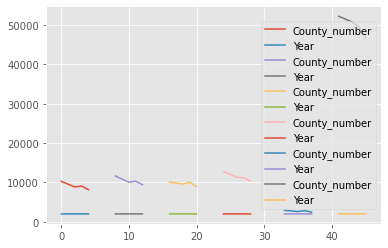

In [13]:
df1 = AED_all.loc[AED_all["County"]=="Orange"]
df2 = AED_all.loc[AED_all["County"]=="San Diego"]
df3 = AED_all.loc[AED_all["County"]=="Riverside"]
df4 = AED_all.loc[AED_all["County"]=="San Bernardino"]
df5 = AED_all.loc[AED_all["County"]=="Ventura"]
df6 = AED_all.loc[AED_all["County"]=="Los Angeles"]

ax = df1.plot(label='Orange')
df2.plot(ax=ax,label='San Diego')
df3.plot(ax=ax,label='Riverside')
df4.plot(ax=ax,label='San Bernardino')
df5.plot(ax=ax,label='Ventura')
df6.plot(ax=ax,label='Los Angeles')

In [14]:
sorty = AED_all.sort_values('Year')
sorty = sort.reset_index(drop=True)
sorty

NameError: name 'sort' is not defined

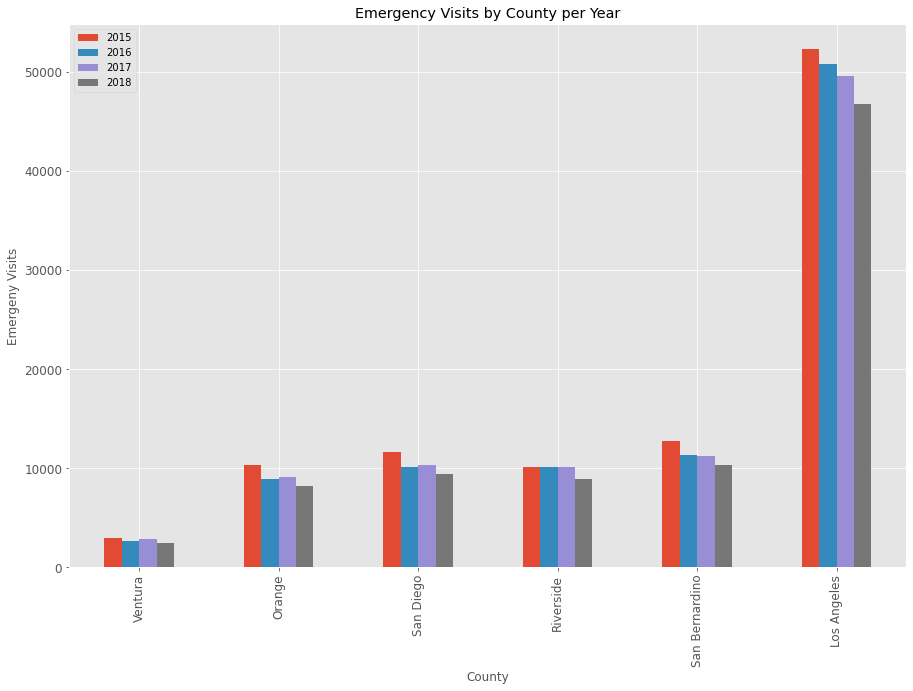

In [15]:
ndf = pd.DataFrame({"2015" : [2933, 10275, 11646, 10111, 12761, 52227],
                    "2016" : [2619, 8878, 10068, 10111, 11335, 50778 ],
                    "2017" : [2836, 9084, 10339, 10076, 11204, 49504],
                    "2018" : [2469, 8183, 9436, 8935, 10343, 46729]},
                   index = ["Ventura", "Orange", "San Diego", "Riverside", "San Bernardino", "Los Angeles"])
ax = ndf[['2015','2016','2017','2018']].plot(kind='bar', title ="Emergency Visits by County per Year", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("County", fontsize=12)
ax.set_ylabel("Emergeny Visits", fontsize=12)
plt.show()


## Resources
https://stackoverflow.com/questions/13757090/pandas-column-access-w-column-names-containing-spaces
https://stackoverflow.com/questions/56947333/how-to-remove-commas-from-all-the-column-in-pandas-at-once
https://www.kite.com/python/answers/how-to-find-rows-with-nan-values-in-a-pandas-dataframe-in-python#
https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/
geeksforgeeks.org/python-pandas-dataframe-groupby/  
https://scitools.org.uk/cartopy/docs/latest/index.html  
https://prd-tnm.s3.amazonaws.com/StagedProducts/Small-scale/data/Boundaries/countyl010g_shp_nt00964.tar.gz   
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html   
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf  
https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html   
https://stackoverflow.com/questions/45947971/overlay-scatter-plot-on-map-img   
https://www.youtube.com/watch?v=4M2aiHvhr5Y   
https://stackoverflow.com/questions/40071096/how-to-plot-multiple-lines-in-one-figure-in-pandas-python-based-on-data-from-mul  



